Performing a multiple regression analysis to understand how multiple independent variables (e.g., year and country names) affect a dependent variable (e.g., agricultural production value) 

In [17]:
import pandas as pd
import statsmodels.api as sm
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
prod_ind_data = pd.read_csv('Dataset/archive/fao_data_production_indices_data.csv')
prod_ind_data['year']=prod_ind_data['year'].astype(pd.Int64Dtype())
agri_data = prod_ind_data[prod_ind_data['category']=='agriculture_pin']
agri_data.dropna(inplace=True)
agri_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_3352\885747683.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_data.dropna(inplace=True)


,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003,1000 Int. $,2289434.0,A,agriculture_pin
...,...,...,...,...,...,...,...,...
64091,Zimbabwe,438,Net per capita PIN (base 1999-2001),1965,Int. $,113.0,A,agriculture_pin
64092,Zimbabwe,438,Net per capita PIN (base 1999-2001),1964,Int. $,128.0,A,agriculture_pin
64093,Zimbabwe,438,Net per capita PIN (base 1999-2001),1963,Int. $,113.0,A,agriculture_pin
64094,Zimbabwe,438,Net per capita PIN (base 1999-2001),1962,Int. $,127.0,A,agriculture_pin


In [4]:
gross_prod_data = agri_data.drop(agri_data[agri_data['element'] != 'Gross Production 1999-2001 (1000 I$)'].index)
focused_data = gross_prod_data[['country_or_area', 'year', 'value']]
focused_data.columns = ['Country', 'Year', 'Gross_Production']
focused_data.head()

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0


In [5]:
rel_data = focused_data[~focused_data.Country.str.endswith('+')]
rel_data

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
1,Afghanistan,2006,2278516.0
2,Afghanistan,2005,2524097.0
3,Afghanistan,2004,2226346.0
4,Afghanistan,2003,2289434.0
...,...,...,...
63856,Zimbabwe,1965,687546.0
63857,Zimbabwe,1964,740738.0
63858,Zimbabwe,1963,625430.0
63859,Zimbabwe,1962,679806.0


In [6]:
#One hot-encoding on Country column
data = pd.get_dummies(rel_data, columns=['Country'], drop_first=True) #drop_first=True
data

,Year,Gross_Production,Country_Albania,Country_Algeria,Country_American Samoa,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,...,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, Bolivarian Republic of",Country_Viet Nam,Country_Wallis and Futuna Islands,Country_Western Sahara,Country_Yemen,Country_Yugoslav SFR,Country_Zambia,Country_Zimbabwe
0,2007,2486910.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,2278516.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2005,2524097.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004,2226346.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2003,2289434.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63856,1965,687546.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63857,1964,740738.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63858,1963,625430.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
63859,1962,679806.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
Y = data['Gross_Production']
X = data[['Year'] + [col for col in data.columns if col.startswith('Country_')]]
X = X.astype(float)  # Convert X to float 
Y = Y.astype(float) 

In [8]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Gross_Production   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 30 Aug 2023   Prob (F-statistic):               0.00
Time:                        19:05:50   Log-Likelihood:            -1.6076e+05
No. Observations:                9275   AIC:                         3.220e+05
Df Residuals:                    9054   BIC:                         3.235e+05
Df Model:                         220                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

https://blog.minitab.com/en/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
HOW DO I INTERPRET THE P-VALUES IN LINEAR REGRESSION ANALYSIS?
The p-value for each term tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

Conversely, a larger (insignificant) p-value suggests that changes in the predictor are not associated with changes in the response.



In [9]:

# Summary table as a DataFrame
summary_df = pd.DataFrame(model.summary2().tables[1])

# Filter countries where p < 0.05
significant_countries = summary_df[summary_df['P>|t|'] < 0.05]

#Drop "const", "Year" from the significant countries df
significant_countries.drop(["const", "Year"], inplace = True)
country_names = [country.replace('Country_', '') for country in significant_countries.index]
print(country_names)

['Argentina', 'Australia', 'Bangladesh', 'Brazil', 'Canada', 'China', 'Colombia', 'Czechoslovakia', 'Egypt', 'France', 'Germany', 'Greece', 'Hungary', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Italy', 'Japan', 'Korea, Republic of', 'Mexico', 'Myanmar', 'Netherlands', 'New Zealand', 'Nigeria', 'Pakistan', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'South Africa', 'Spain', 'Thailand', 'Turkey', 'USSR', 'Ukraine', 'United Kingdom', 'United States of America', 'Viet Nam', 'Yugoslav SFR']


C:\Users\saumy\AppData\Local\Temp\ipykernel_3352\3919067724.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_countries.drop(["const", "Year"], inplace = True)


In [12]:
#Filter data from the dataset where countries are significant countries
# flag = rel_data['Country'].isin(country_names)
# rel_data = rel_data[flag]
# rel_data
rel_data = rel_data[rel_data['Year'] == 2007]
rel_data

,Country,Year,Gross_Production
0,Afghanistan,2007,2486910.0
564,Albania,2007,824818.0
846,Algeria,2007,4225072.0
1128,American Samoa,2007,2415.0
1692,Angola,2007,1480803.0
...,...,...,...
61496,Wallis and Futuna Islands,2007,2606.0
62624,Western Sahara,2007,5164.0
63188,Yemen,2007,1136084.0
63532,Zambia,2007,831754.0


Visualize data on World map using Geopandas

In [13]:
#https://www.analyticsvidhya.com/blog/2021/09/how-to-visualise-data-in-maps-using-geopandas/
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

print(f"{type(df_world)}, {df_world.geometry.name}")

print(df_world.head())

C:\Users\saumy\AppData\Local\Temp\ipykernel_3352\1752608810.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<class 'geopandas.geodataframe.GeoDataFrame'>, geometry
       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [14]:
df_world_agri = df_world.merge(rel_data, how="left", left_on=['name'], right_on=['Country'])
print("Type of DataFrame : ", type(df_world_agri), df_world_agri.shape[0])
df_world_agri.head()



Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 177


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Year,Gross_Production
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2007,147084.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,<NA>,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,<NA>,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2007,22406180.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,2007,184698800.0


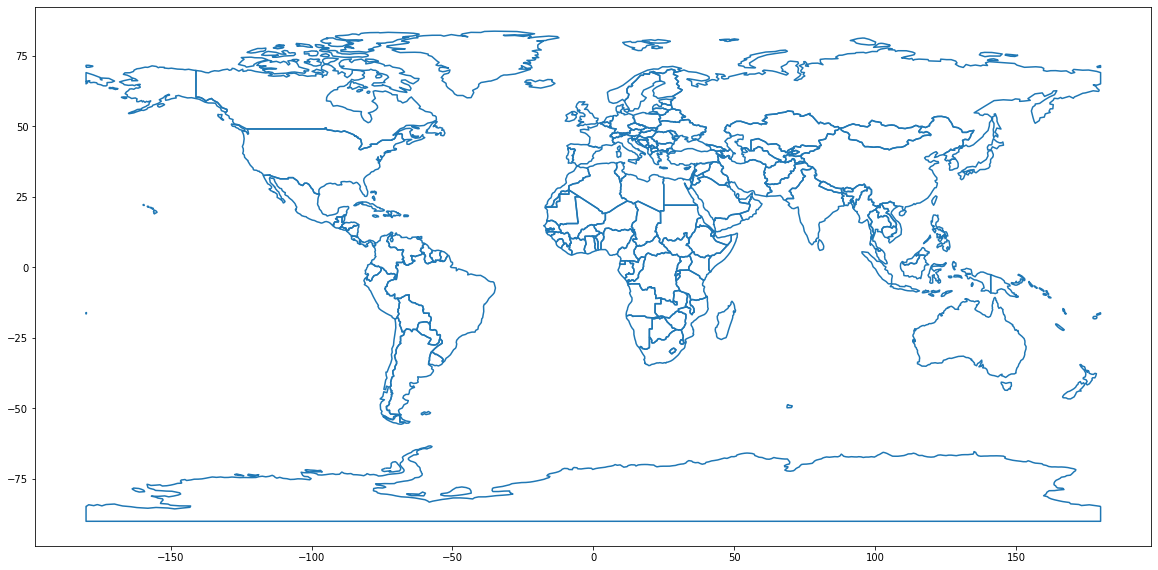

In [15]:
ax = df_world["geometry"].boundary.plot(figsize=(20,16))

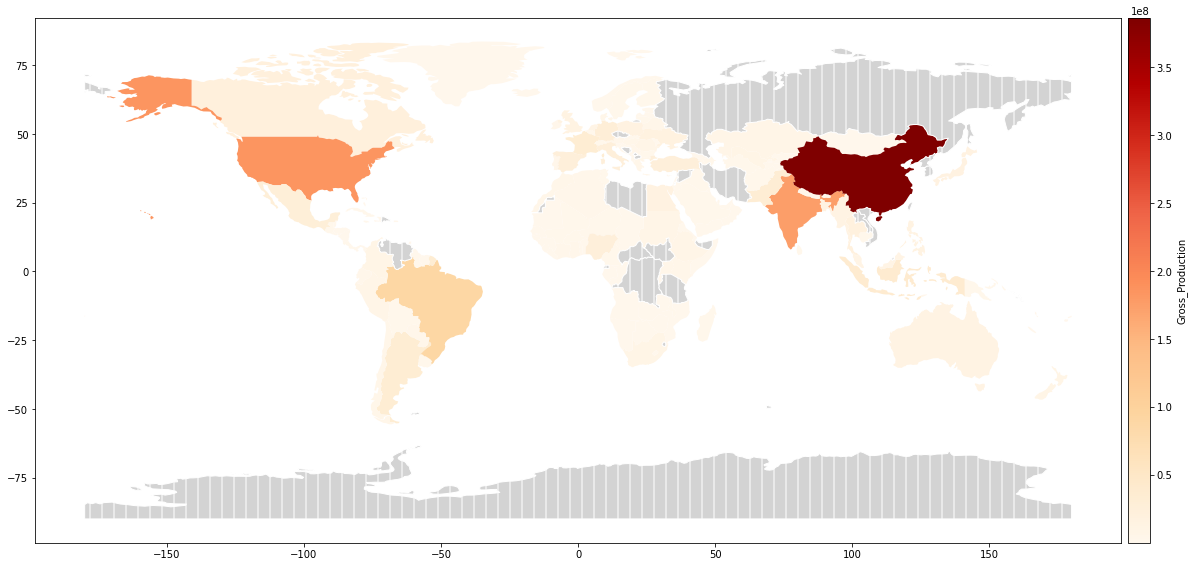

In [24]:


fig, ax = plt.subplots(1, 1, figsize=(20, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad="0.5%")
df_world_agri.plot(column="Gross_Production", ax=ax, cax=cax, cmap='OrRd',

legend=True, legend_kwds={"label": "Gross_Production"}, missing_kwds={"color": "lightgrey", "edgecolor": "white", "hatch": "|"})
plt.show()